In [180]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [181]:
df = pd.read_csv("C:\\Users\\HP\\Desktop\\datascienceNumpy\\DeepLearning\\Churn_Modelling.csv")

In [182]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [183]:
df.shape

(10000, 14)

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [185]:
df.duplicated().sum()

np.int64(0)

In [186]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [187]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [188]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [189]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [190]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [191]:
# we arent doing eda fully now because the whole point is to 
# learn how to build a aritifical neral network using keras

In [192]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [193]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [194]:
# in balance column there are some six digits number and some 1 digit 
# this will result in more time in convergence so we will scale it 

In [195]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Exited'])
y = df['Exited']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [196]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [197]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [198]:
X_train.shape

(8000, 11)

In [199]:
y_train.shape

(8000,)

In [200]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [201]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]], shape=(8000, 11))

In [202]:
import tensorflow
from tensorflow import keras 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [203]:
# Sequential creates a linear stack of layers (one layer after another)
model = Sequential()

# First Hidden Layer:
# - Dense(3): This layer has 3 neurons.
# - activation='sigmoid': Each neuron uses the sigmoid function to squash outputs between 0 and 1.
# - input_dim=11: This is CRITICAL. It tells the model your data has 11 features (columns).
model.add(Dense(3, activation='sigmoid', input_dim=11))

# Output Layer:
# - Dense(1): A single neuron to produce the final prediction.
# - activation='sigmoid': Usually used for Binary Classification (predicting 0 or 1).
model.add(Dense(1, activation='sigmoid'))

c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [204]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 3)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

In [205]:
# now we complile the model and tell it some stuff
# like which loss function you will use
# which optimizer you will use for gd

In [206]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [207]:
history = model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5136 - loss: 0.6993 - val_accuracy: 0.6856 - val_loss: 0.6284
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7656 - loss: 0.5797 - val_accuracy: 0.7937 - val_loss: 0.5511
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7967 - loss: 0.5239 - val_accuracy: 0.7975 - val_loss: 0.5130
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7972 - loss: 0.4953 - val_accuracy: 0.7975 - val_loss: 0.4914
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7972 - loss: 0.4781 - val_accuracy: 0.7975 - val_loss: 0.4768
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7973 - loss: 0.4658 - val_accuracy: 0.7987 - val_loss: 0.4662
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7980 - loss: 0.4563 - val_accuracy: 0.7994 - val_loss: 0.4577
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7989 - loss: 0.4487 - val_accu

In [208]:
model.layers[0].get_weights()

[array([[-1.5581274e-01,  2.7313879e-02,  2.3300337e-02],
        [ 4.0672154e+00,  3.2189515e-01, -1.7487748e-01],
        [ 4.9002923e-02,  6.3377261e-02,  1.2442617e-01],
        [-6.5432839e-02, -3.3492348e-01, -3.1630132e-01],
        [ 1.0046965e-01, -2.0474062e+00, -3.1374317e-01],
        [ 2.8332981e-01,  5.1045835e-02,  2.1093427e-01],
        [ 1.2845407e+00, -1.3968132e+00,  1.0580747e+00],
        [-2.9661578e-01, -2.9903785e-03, -1.8761185e-01],
        [ 9.7228326e-02,  3.8702130e-02, -5.7746637e-01],
        [ 2.0195954e-01,  2.3368118e-02, -1.1043755e-02],
        [-2.7612444e-02,  9.7200394e-02,  5.2037990e-01]], dtype=float32),
 array([-0.57642335, -2.1623166 ,  0.7258815 ], dtype=float32)]

In [209]:
model.layers[1].get_weights()

[array([[ 2.246327 ],
        [ 1.3817146],
        [-2.7625554]], dtype=float32),
 array([-1.1925431], dtype=float32)]

In [210]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [211]:
# now since we used sigmoid the values arent 0 or one but between them
# so now we convert them to 0 and 1

In [212]:
# for now we are assumign the threshold is 0.5

In [213]:
y_pred = np.where(y_log>0.5,1 , 0)

In [214]:
from sklearn.metrics import accuracy_score

In [215]:
accuracy_score(y_test,y_pred)

0.8445

In [216]:
history

In [217]:
history.history

{'accuracy': [0.5135937333106995,
  0.765625,
  0.7967187762260437,
  0.7971875071525574,
  0.7971875071525574,
  0.7973437309265137,
  0.7979687452316284,
  0.7989062666893005,
  0.8018749952316284,
  0.8040624856948853,
  0.8062499761581421,
  0.8081250190734863,
  0.8109375238418579,
  0.8135937452316284,
  0.8142187595367432,
  0.8148437738418579,
  0.8146874904632568,
  0.8168749809265137,
  0.8135937452316284,
  0.8139062523841858,
  0.8143749833106995,
  0.8139062523841858,
  0.8160937428474426,
  0.815625011920929,
  0.8160937428474426,
  0.8173437714576721,
  0.817187488079071,
  0.8190624713897705,
  0.8196874856948853,
  0.8198437690734863,
  0.8201562762260437,
  0.821093738079071,
  0.8218749761581421,
  0.8220312595367432,
  0.8226562738418579,
  0.8235937356948853,
  0.8240625262260437,
  0.8235937356948853,
  0.8248437643051147,
  0.824999988079071,
  0.8254687786102295,
  0.8257812261581421,
  0.8260937333106995,
  0.8270312547683716,
  0.8274999856948853,
  0.82734376

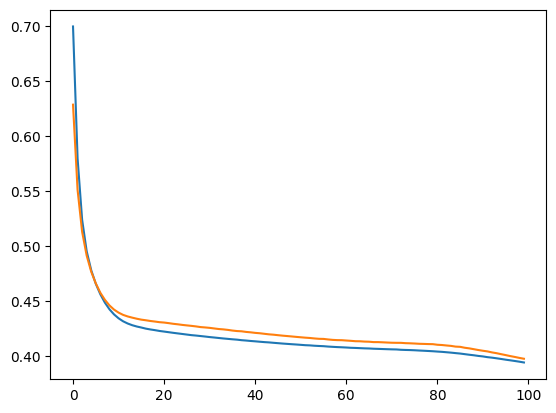

In [219]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

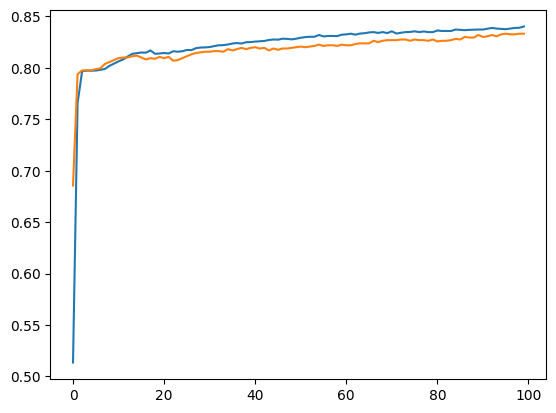

In [220]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])